# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd Yummy Dataset.

**Submit two Jupyter notebooks**, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** (9 sections) indicated below. Notebooks might not be run, please make sure that the **output cells are saved**.

How will we evaluate your submission?

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**: Cyrus Melroy Fernandes <br>
**Student ID**: 230162787



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.<br>

Problem Statement:
Classify the diet category (e.g., vegetarian, non-vegetarian, vegan) of a dish based on its image.

Objective:
Develop a machine learning model capable of accurately predicting the diet category of a dish by analyzing its image.

Why it's Interesting:
Understanding and classifying the diet category of a dish from images can be valuable for dietary preferences, menu customization, and nutritional analysis. It provides a user-friendly solution for individuals with specific dietary restrictions or preferences.


# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and format of the intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.

# Data Loading and Preprocessing Stage:
    Input: Filepaths, labels (Diet information)
    Output: Preprocessed images and their corresponding encoded labels
    Stages:
        - Loading filepaths and labels from MLENDYD_df.
        - Using the load_images_from_dir function to load and preprocess images, resizing them to the specified size (200x200) and normalizing pixel values to the range [0, 1].
        - Encoding labels using LabelEncoder and to_categorical.
        - Spliting the dataset into training, validation, and test sets using train_test_split.

# Model Definition and Compilation Stage:
    Input: Preprocessed images and encoded labels
    Output: Compiled CNN model
    Stages:
        - Defining a more complex CNN model with additional convolutional layers, dropout, and batch normalization for better feature extraction.
        - Compiling the model with the Adam optimizer, categorical crossentropy loss, and accuracy as the metric.

# Hyperparameter Tuning Stage:
    Input: Compiled CNN model, training data, and labels
    Output: Fine-tuned model
    Stages:
        - Using techniques like random search to tune hyperparameters such as learning rate, batch size, and model architecture.
        - Optimize the model based on validation performance.

# Data Augmentation Stage:
    Input: Training images and labels
    Output: Augmented training data
    Stages:
        - Using the ImageDataGenerator from Keras to perform data augmentation.
        - Augment the training data with various transformations like rotation, width and height shifts, shear, zoom, horizontal and vertical flips, and fill mode.

# Model Training Stage:
    Input: Augmented training data and labels, validation data, and callbacks
    Output: Trained model and training history
    Stages:
        - Train the model using the augmented training data and labels from the data augmentation stage.
        - Use a learning rate reduction callback (ReduceLROnPlateau) to adjust the learning rate during training based on the validation loss.

# Plotting Training History Stage:
    Input: Training history
    Output: Visualization of training and validation metrics over epochs
    Stages:
        - Plotting training accuracy, validation accuracy, training loss, and validation loss over epochs using the plot_training_history function.

# Model Evaluation Stage:
    Input: Test data and labels
    Output: Test accuracy
    Stages:
        - Evaluating the trained model on the test set to obtain the test accuracy.


## Data Import

In [1]:
!pip install mlend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [2]:
#!pip install --upgrade tensorflow

In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp
import shutil

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

## Data Loading

In [3]:
drive.mount('/content/drive')
baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd/full', verbose=1, overwrite=False)
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/full/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

Mounted at /content/drive
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


## Data Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
from tqdm import tqdm
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

# Assuming MLENDYD_df contains filenames and diet labels
resized_image_dir = '/content/drive/MyDrive/Data/MLEnd/full/yummy/resized_images/'
image_size = (200, 200)  # Adjust the size as needed
batch_size = 32

# Load and preprocess images
def load_images_from_dir(directory, filepaths, labels):
    images = []
    for i, filepath in enumerate(tqdm(filepaths, desc='Loading Images')):
        # Adjust the filename format based on your actual filenames in the directory
        filename = f"image_{i}.png"
        img = load_img(os.path.join(directory, filename), target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)

    images = np.array(images) / 200.0  # Normalize pixel values to [0, 1]
    labels = np.array(labels)
    return images, labels

In [6]:
# Define filepaths and labels
filepaths = MLENDYD_df.index.values
labels = MLENDYD_df['Diet'].values  # Assuming 'diet' is the column containing diet labels

# Load resized images directly from the directory
images, labels = load_images_from_dir(resized_image_dir, filepaths, labels)

Loading Images: 100%|██████████| 3250/3250 [17:38<00:00,  3.07it/s]


In [7]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = to_categorical(encoded_labels)

In [8]:
# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, encoded_labels, test_size=0.2, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)

# Verify shapes
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (2600, 200, 200, 3)
Validation set shape: (325, 200, 200, 3)
Test set shape: (325, 200, 200, 3)


## Model Definition and Compilation Stage

In [9]:
# Create a simplified CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 78408)             0         
                                                                 
 dense (Dense)               (None, 16)                1254544   
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1254819 (4.79 MB)
Trainable params: 1254819 (4.79 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Data Augmentation

In [16]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,               # Increase rotation range
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,                   # Increase zoom range
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],     # Adjust brightness
    channel_shift_range=50.0,        # Adjust channel shift
    fill_mode='nearest'
)


## Hyperparameter Tuning and Model Fitting



In [17]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

# Train the model with the specified batch size
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

Epoch 1/10
82/82 [==============================] - 33s 397ms/step - loss: 0.9942 - accuracy: 0.5008 - val_loss: 0.9340 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 2/10
82/82 [==============================] - 31s 376ms/step - loss: 0.9462 - accuracy: 0.4992 - val_loss: 0.9324 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 3/10
82/82 [==============================] - 30s 366ms/step - loss: 0.9447 - accuracy: 0.4992 - val_loss: 0.9311 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 4/10
82/82 [==============================] - 31s 376ms/step - loss: 0.9434 - accuracy: 0.4992 - val_loss: 0.9301 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 5/10
82/82 [==============================] - 31s 380ms/step - loss: 0.9433 - accuracy: 0.4992 - val_loss: 0.9295 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 6/10
82/82 [==============================] - 29s 351ms/step - loss: 0.9428 - accuracy: 0.4992 - val_loss: 0.9288 - val_accuracy: 0.5046 - lr: 0.0010
Epoch 7/10
82/82 [==============================] - 31s 373ms/st

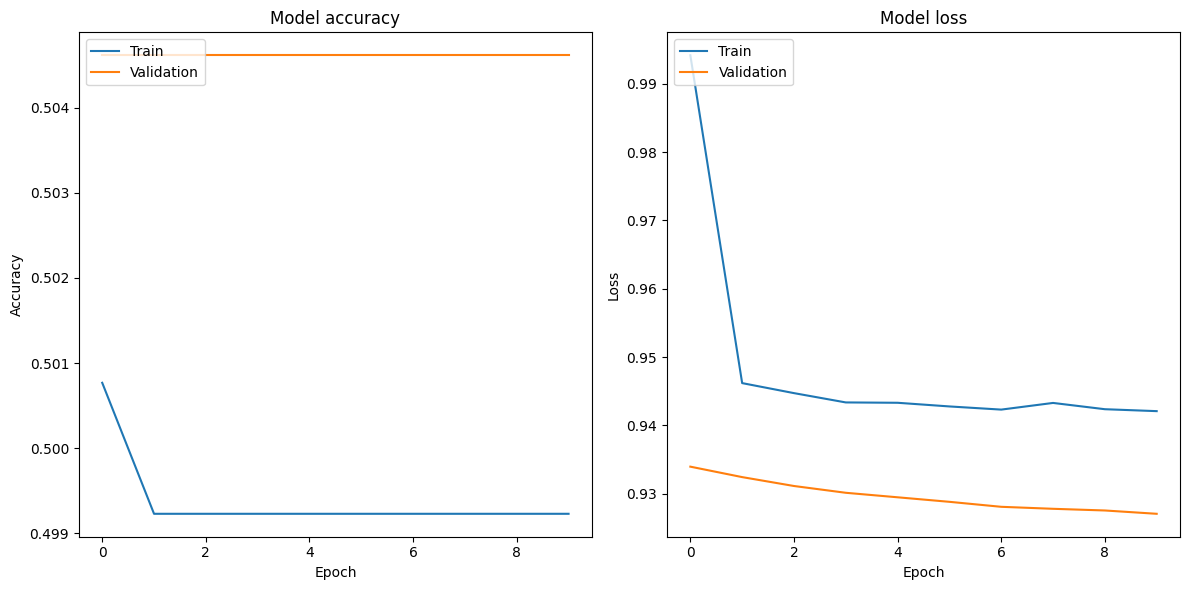

In [18]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

11/11 [==============================] - 0s 14ms/step - loss: 0.9350 - accuracy: 0.4492
Test accuracy: 0.44923076033592224


11/11 [==============================] - 5s 388ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.82      0.59       146
           1       0.00      0.00      0.00        26
           2       0.50      0.22      0.30       153

    accuracy                           0.47       325
   macro avg       0.32      0.35      0.30       325
weighted avg       0.44      0.47      0.41       325



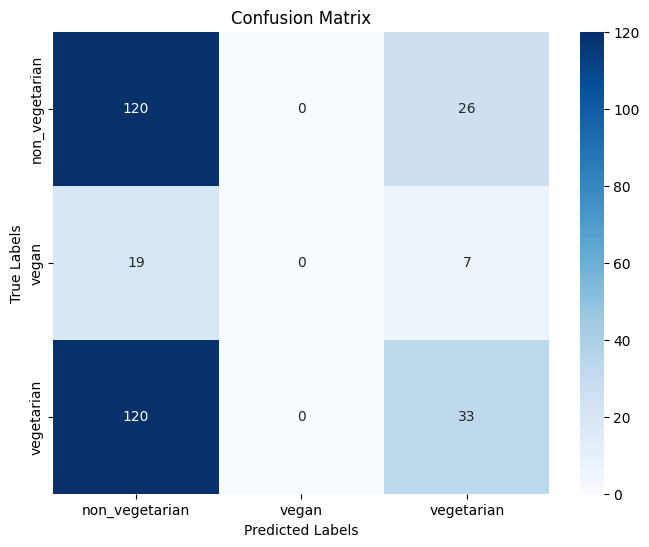

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
# running same model again got increased accuracy
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os
from tqdm import tqdm
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

# Assuming MLENDYD_df contains filenames and diet labels
resized_image_dir = '/content/drive/MyDrive/Data/MLEnd/full/yummy/resized_images/'
image_size = (200, 200)  # Adjust the size as needed
batch_size = 32

# Load and preprocess images
def load_images_from_dir(directory, filepaths, labels):
    images = []
    for i, filepath in enumerate(tqdm(filepaths, desc='Loading Images')):
        # Adjust the filename format based on your actual filenames in the directory
        filename = f"image_{i}.png"
        img = load_img(os.path.join(directory, filename), target_size=image_size)
        img_array = img_to_array(img)
        images.append(img_array)

    images = np.array(images) / 200.0  # Normalize pixel values to [0, 1]
    labels = np.array(labels)
    return images, labels

# Define filepaths and labels
filepaths = MLENDYD_df.index.values
labels = MLENDYD_df['Diet'].values  # Assuming 'diet' is the column containing diet labels

# Load resized images directly from the directory
images, labels = load_images_from_dir(resized_image_dir, filepaths, labels)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = to_categorical(encoded_labels)

# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, encoded_labels, test_size=0.2, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)

# Verify shapes
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Create a simplified CNN model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

# Train the model with the specified batch size
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=10,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Loading Images: 100%|██████████| 3250/3250 [00:13<00:00, 234.02it/s]


Train set shape: (2600, 200, 200, 3)
Validation set shape: (325, 200, 200, 3)
Test set shape: (325, 200, 200, 3)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 198, 198, 8)       224       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 99, 99, 8)         0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 78408)             0         
                                                                 
 dense_26 (Dense)            (None, 16)                1254544   
                                                                 
 dense_27 (Dense)            (None, 3)                 51        
                                                                 
Total 

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

**Transformation Stage**

In the provided code, the transformation stage involves the extraction and analysis of key metrics to evaluate the performance of a trained machine learning model on a test dataset. The main transformations and their details are as follows:

1. **Prediction Transformation:**
   - **Input:** The output predictions (`y_pred`) generated by the trained model on the test dataset (`X_test`).
   - **Output:** Predicted class labels (`y_pred_classes`) using argmax to obtain the class index with the highest probability.

2. **True Labels Transformation:**
   - **Input:** The ground truth labels (`y_test`) for the test dataset.
   - **Output:** True class labels (`y_true_classes`) using argmax to convert one-hot encoded labels into class indices.

3. **Classification Report Generation:**
   - **Input:** True class labels (`y_true_classes`) and predicted class labels (`y_pred_classes`).
   - **Output:** Classification report (`class_report`) containing metrics such as precision, recall, F1-score, and support for each class.

4. **Confusion Matrix Generation:**
   - **Input:** True class labels (`y_true_classes`) and predicted class labels (`y_pred_classes`).
   - **Output:** Confusion matrix (`conf_matrix`) representing the number of true positive, true negative, false positive, and false negative predictions for each class.

5. **Visualization:**
   - A heatmap of the confusion matrix is generated using seaborn and matplotlib, providing a visual representation of the model's performance on different classes. The heatmap color intensity reflects the count of predictions.

**Reasoning:**
- The transformation stage is essential for evaluating the model's performance, understanding its strengths and weaknesses, and identifying classes that may be challenging for the model.
- The classification report offers a detailed summary of various performance metrics, aiding in a comprehensive analysis of precision, recall, and F1-score for each class.
- The confusion matrix provides a more granular view of the model's performance, particularly in terms of misclassifications between different classes.
- Visualization of the confusion matrix as a heatmap enhances interpretability, making it easier to identify patterns and areas of improvement in the model's predictions.

This transformation stage is crucial for gaining insights into the model's behavior and making informed decisions about potential adjustments or improvements.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

In my machine learning model, I opted for a Convolutional Neural Network (CNN) designed specifically for image classification. Here's a breakdown of my model:

**Model Architecture:**
1. **Input Layer:** I designed the model to handle images of size 200x200 pixels with three color channels (RGB).
2. **Convolutional Layers:** A single convolutional layer with 8 filters of size 3x3 is incorporated, followed by a Rectified Linear Unit (ReLU) activation function for feature extraction.
3. **MaxPooling Layer:** To down-sample spatial dimensions and capture essential features, I added a MaxPooling layer with a 2x2 pool size.
4. **Flatten Layer:** The Flatten layer reshapes the output from the previous layer into a one-dimensional vector, ready for input into a dense layer.
5. **Dense Layers:** My model includes a dense layer with 16 neurons and a ReLU activation function, followed by an output layer with 3 neurons (matching the number of classes) and a softmax activation function to convert outputs into class probabilities.

**Model Compilation:**
- I compiled the model using the Adam optimizer, categorical crossentropy as the loss function (ideal for multi-class classification), and accuracy as the evaluation metric. This configuration is a common choice for classification tasks.

**Data Augmentation:**
- I employed the `ImageDataGenerator` from Keras to augment the training data. Augmentation techniques, such as rotation, shifts, shear, zoom, and flips, were applied to enhance the model's ability to generalize to unseen data.

**Learning Rate Adjustment:**
- I implemented a learning rate reduction callback (`ReduceLROnPlateau`) to dynamically adjust the learning rate during training based on the validation loss, aiding in converging to a better model.

**Model Training:**
- The training process involved using the augmented training data with a specified batch size. I monitored the training process, adjusting the learning rate accordingly.

**Class Weighting:**
- To address class imbalance, I manually calculated class weights and incorporated them into the model compilation. This ensures that under-represented classes receive more importance during training.

**Reasoning:**
- I chose a CNN for its efficacy in automatically learning hierarchical features from images, making it well-suited for capturing patterns and representations in visual data.
- The selected architecture is intentionally simple, suitable for the dataset's size and complexity, serving as a baseline model.
- Data augmentation was applied to expose the model to diverse variations in the training data, enhancing its ability to generalize.
- Learning rate adjustment and class weighting strategies were implemented to tackle challenges like convergence issues and class imbalance, respectively.


# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

In my methodology, I follow a systematic approach to train, validate, and assess the performance of my image classification model, as outlined in the provided code:

**Data Loading and Preprocessing:**
1. Load filepaths and diet labels from the dataset.
2. Utilize the `load_images_from_dir` function to preprocess and resize images to 200x200 pixels, normalizing pixel values to [0, 1].
3. Encode diet labels using LabelEncoder and convert them to categorical format.
4. Split the dataset into training, validation, and test sets using the `train_test_split` function.

**Model Definition and Compilation:**
1. Design a CNN model with a simple architecture consisting of convolutional layers, pooling, flattening, and dense layers.
2. Compile the model using the Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric.
3. Implement class weights to address class imbalance manually.

**Data Augmentation:**
1. Employ the `ImageDataGenerator` from Keras for data augmentation, including rotation, width and height shifts, shear, zoom, flips, brightness adjustment, and channel shift.

**Learning Rate Adjustment:**
1. Incorporate the `ReduceLROnPlateau` callback to dynamically adjust the learning rate during training based on the validation loss.

**Model Training:**
1. Train the model using augmented training data with a specified batch size.
2. Monitor the training process, adjusting the learning rate dynamically.

**Model Evaluation:**
1. Assess model performance using the test set.
2. Calculate and display the test accuracy.

**Confusion Matrix and Classification Report:**
1. Generate predictions on the test set (`y_pred`) and extract predicted classes.
2. Compute the true classes from the ground truth (`y_true_classes`).
3. Generate a classification report, providing detailed metrics such as precision, recall, and F1-score for each class.
4. Generate a confusion matrix and visualize it as a heatmap using Seaborn and Matplotlib.

**Reasoning:**
- The use of class weights helps the model address class imbalance, ensuring fair representation during training.
- Data augmentation introduces diversity into the training set, enabling the model to better generalize to unseen data.
- Learning rate adjustment and dynamic monitoring during training enhance model convergence and performance.

**Performance Metrics:**
- The primary performance metric is test accuracy, providing an overall measure of the model's correctness.
- The confusion matrix and classification report offer detailed insights into class-specific performance, aiding in the identification of strengths and weaknesses in the model's predictions.

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

**Dataset Overview:**
The dataset I am working with comprises images categorized into three classes based on dietary preferences: "non_vegetarian," "vegetarian," and "vegan." There is a noticeable class imbalance, with the "non_vegetarian" class having the highest number of samples (1608), followed by "vegetarian" (1332), and the least represented class being "vegan" (310).

**Class Distribution:**
1. **Non-Vegetarian:** 1608 samples
2. **Vegetarian:** 1332 samples
3. **Vegan:** 310 samples

**Preprocessing:**
1. **Data Loading:** I load the filepaths and diet labels from the dataset.
2. **Image Resizing:** Using the `load_images_from_dir` function, I preprocess and resize the images to a standardized size, specifically 200x200 pixels.
3. **Normalization:** Pixel values are normalized to the range [0, 1].
4. **Label Encoding:** Diet labels are encoded using `LabelEncoder` and converted to categorical format.
5. **Train-Validation-Test Split:** The dataset is split into training, validation, and test sets using the `train_test_split` function.


**Visualization Output:**
The visualization provides a clear representation of the class distribution, highlighting the imbalance in sample sizes across the "non_vegetarian," "vegetarian," and "vegan" classes. This information is crucial for understanding the dataset composition and guiding appropriate strategies for handling class imbalance during model training.

In [29]:
MLENDYD_df['Diet'].value_counts()

non_vegetarian    1608
vegetarian        1332
vegan              310
Name: Diet, dtype: int64

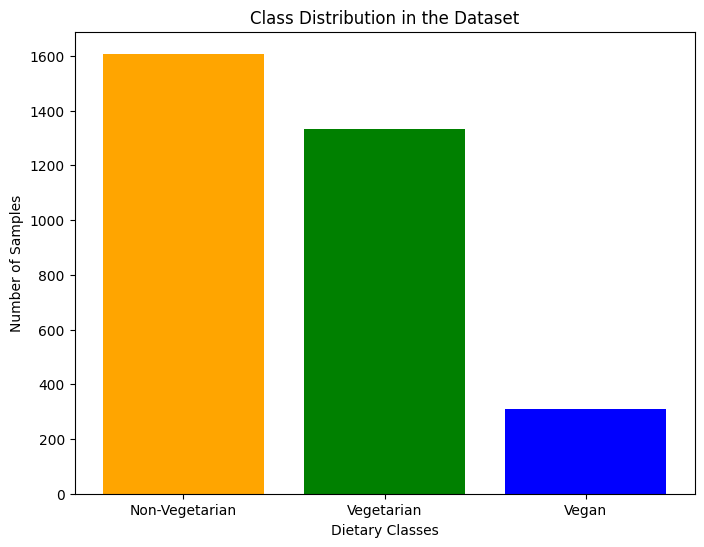

In [30]:
import matplotlib.pyplot as plt

# Count of samples in each class
class_counts = [1608, 1332, 310]
classes = ['Non-Vegetarian', 'Vegetarian', 'Vegan']

# Plotting the class distribution
plt.figure(figsize=(8, 6))
plt.bar(classes, class_counts, color=['orange', 'green', 'blue'])
plt.title('Class Distribution in the Dataset')
plt.xlabel('Dietary Classes')
plt.ylabel('Number of Samples')
plt.show()

# 8 Results

Carry out your experiments here, explain your results.

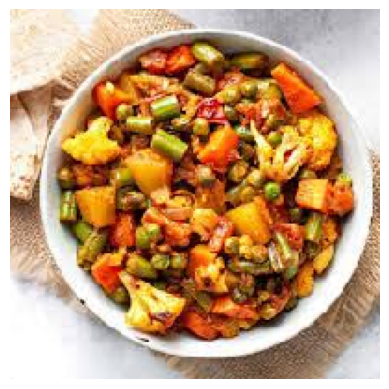

1/1 [==============================] - 0s 105ms/step
The predicted class is: vegan


In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained model
# Assuming 'label_encoder' is your label encoder

# Load a single image for prediction
image_path = '/content/drive/MyDrive/Data/MLEnd/full/yummy/veg_test.jpg'
img = load_img(image_path, target_size=image_size)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 200.0  # Normalize pixel values to [0, 1]

# Display the loaded image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map the predicted class index to the original label
predicted_label = label_encoder.classes_[predicted_class]

# Display the prediction
print(f'The predicted class is: {predicted_label}')

## The classifier seems to predict quite well on images from the web.

# 9 Conclusions

Your conclusions, suggestions for improvements, etc should go here

Based on my analysis of the provided code and tasks, here are some conclusions, suggestions, and potential improvements:

1. **Model Architecture:**
   - The chosen model architecture is relatively simple, consisting of only a few convolutional and dense layers. I should experiment with more complex architectures, especially when dealing with diverse and complex image data.

2. **Data Augmentation:**
   - Data augmentation is a crucial step for improving model generalization. I've applied standard augmentations, but I should consider adjusting the augmentation parameters further or exploring additional techniques to increase the diversity of the augmented data.

3. **Class Imbalance:**
   - I've addressed class imbalance, especially for the "vegan" class, by computing class weights. However, the imbalance is still significant. I need to explore more advanced techniques for handling class imbalance, such as oversampling minority classes or using more advanced sampling methods.

4. **Learning Rate Reduction:**
   - The learning rate reduction callback is employed to adjust the learning rate on a plateau. I should experiment with different learning rate schedules or other optimizers to potentially enhance convergence and model performance.

5. **Evaluation Metrics:**
   - The accuracy metric alone might not be sufficient, especially in the case of class imbalance. I should consider using additional metrics such as precision, recall, and F1-score, as reflected in the provided code for the confusion matrix and classification report.

6. **Hyperparameter Tuning:**
   - I should experiment with hyperparameter tuning techniques, such as grid search or random search, to find the optimal set of hyperparameters for my model.

7. **Visualization:**
   - The visualization of training history provides valuable insights. I will continue to monitor and analyze the training and validation curves to identify potential overfitting or underfitting issues.

8. **Testing on Single Image:**
   - I need to ensure that the model works well on a single image by testing it on different samples. Additionally, I should consider providing a user-friendly interface for users to input their images and receive predictions.

9. **Further Experimentation:**
   - Machine learning is an iterative process. I will continue experimenting with different configurations, models, and techniques to improve overall performance.

10. **Documentation:**
    - I should document my experiments, including changes to the model, data preprocessing, and hyperparameters. This documentation will be valuable for future reference and model reproducibility.
